# 4.10 Coding Etiquette and Excel Reporting

### Table of Contents

1. Importing libraries and data
2. Addressing Personally Identifiable Information
3. Creating a regional flag within the dataset
4. Excluding low-activity customers
5. Creating customer "profile" for targeted marketing purposes
6. Visualizing "profile" distribution
7. Looking for insights through the customer "profile" groups
8. Comparing customer profiles with regions and departments


### 1. Import the data set you exported in Exercise 4.9 into a new Jupyter notebook. This should be the merged version of your data that contains the new customers column.

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
#Creating a path for this project
path = r'C:\Users\mavid\OneDrive - Universidad Nacional de Colombia\Weiterbildung\Exercises\Data_Inmersion\Achivement4\01_23_InstacartBasketAnalysis_CarlosBaena'
print(path)

C:\Users\mavid\OneDrive - Universidad Nacional de Colombia\Weiterbildung\Exercises\Data_Inmersion\Achivement4\01_23_InstacartBasketAnalysis_CarlosBaena


In [4]:
# Importing 'orders_products_merged.pkl' via pandas.pkl and os.path.join
df_all = pd.read_pickle(os.path.join(path, '02 Data','Prepared Data', 'orders_products_all.pkl'))

### 2. Consider any security implications that might exist for this new data. You’ll need to address any PII data in the data before continuing your analysis.

In [7]:
df_all.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,spending_flag,median_prior_orders,order_frequency_flag,gender,state,age,date_joined,number_dependants,family_status,income
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423


In [5]:
# Check shape of data frame
df_all.shape

(32404859, 31)

In [6]:
# Check data types
df_all.dtypes

order_id                     int64
user_id                     object
order_number                 int64
orders_day_of_week           int64
order_hour_of_day            int64
days_since_prior_order     float64
product_id                   int64
add_to_cart_order            int64
reordered                    int64
product_name                object
aisle_id                     int64
department_id                int64
prices                     float64
_merge                    category
price_range_loc             object
busiest_day                 object
busiest_days                object
busiest_period_of_day       object
max_order                    int64
loyalty_flag                object
average_price              float64
spending_flag               object
median_prior_orders        float64
order_frequency_flag        object
gender                      object
state                       object
age                          int64
date_joined                 object
number_dependants   

#### A security concern of this dataset was the information related to name and surname. Nontheless, these columns were deleted in past exercise, due to that, they are not relevant for this specific project. In addition, user_id is more than enough to identify the different customers.

### 3. The Instacart officers are interested in comparing customer behavior in different geographic areas. Create a regional segmentation of the data. You’ll need to create a “Region” column based on the “State” column from your customers data set.

In [8]:
# Checking value counts for the state column
df_all['state'].value_counts()

Pennsylvania            667082
California              659783
Rhode Island            656913
Georgia                 656389
New Mexico              654494
Arizona                 653964
North Carolina          651900
Oklahoma                651739
Alaska                  648495
Minnesota               647825
Massachusetts           646358
Wyoming                 644255
Virginia                641421
Missouri                640732
Texas                   640394
Colorado                639280
Maine                   638583
North Dakota            638491
Alabama                 638003
Kansas                  637538
Louisiana               637482
Delaware                637024
South Carolina          636754
Oregon                  636425
Arkansas                636144
Nevada                  636139
New York                635983
Montana                 635265
South Dakota            633772
Illinois                633024
Hawaii                  632901
Washington              632852
Mississi

#### Creating containing vectors for the different states

In [9]:
Northeast = ['Maine', 'New Hampshire', 'Vermont', 'Massachusetts', 'Rhode Island', 'Connecticut', 'New York', 'Pennsylvania', 'New Jersey']

In [10]:
Midwest = ['Wisconsin', 'Michigan', 'Illinois', 'Indiana', 'Ohio', 'North Dakota', 'South Dakota', 'Nebraska', 'Kansas', 'Minnesota', 'Iowa', 'Missouri']

In [11]:
South = ['Delaware', 'Maryland', 'District of Columbia', 'Virginia', 'West Virginia', 'North Carolina', 'South Carolina', 'Georgia', 'Florida', 'Kentucky',
'Tennessee', 'Mississippi', 'Alabama', 'Oklahoma', 'Texas', 'Arkansas', 'Louisiana']

In [12]:
West = ['Idaho', 'Montana', 'Wyoming', 'Nevada', 'Utah', 'Colorado', 'Arizona', 'New Mexico', 'Alaska', 'Washington', 'Oregon', 'California', 'Hawaii']

#### Creating column region

In [13]:
df_all.loc[df_all['state'].isin(Northeast), 'region'] = 'Northeast'

In [14]:
df_all.loc[df_all['state'].isin(Midwest), 'region'] = 'Midwest'

In [15]:
df_all.loc[df_all['state'].isin(South), 'region'] = 'South'

In [18]:
df_all.loc[df_all['state'].isin(West), 'region'] = 'West'

#### Checking new column 'region'

In [19]:
df_all['region'].value_counts()

South        10791885
West          8292913
Midwest       7597325
Northeast     5722736
Name: region, dtype: int64

In [21]:
df_all.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,median_prior_orders,order_frequency_flag,gender,state,age,date_joined,number_dependants,family_status,income,region
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South


### Determine whether there's a difference in spending habits between the different U.S regions

In [22]:
# Creating crosstab according to region and spending flag
crosstab = pd.crosstab(df_all['region'], df_all['spending_flag'], dropna = False)

In [24]:
crosstab

spending_flag,High spender,Low spender
region,,
Midwest,29444,7567881
Northeast,18662,5704074
South,40905,10750980
West,31366,8261547


##### There is a difference between the spending habits in the different regions. In general, there is a higher number low spender customers in all the areas. However, the south part presents the higher values in both cases. 

### 4 The Instacart CFO isn’t interested in customers who don’t generate much revenue for the app. Create an exclusion flag for low-activity customers (customers with less than 5 orders) and exclude them from the data. Make sure you export this sample.

In [25]:
# Creating an exclusion flag
df_all.loc[df_all['max_order'] < 5, 'exclusion flag'] = 'low-activity'
df_all.loc[df_all['max_order'] >= 5, 'exclusion flag'] = 'high-activity'

In [26]:
df_all['exclusion flag'].value_counts()

high-activity    30964564
low-activity      1440295
Name: exclusion flag, dtype: int64

In [27]:
df_all.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,order_frequency_flag,gender,state,age,date_joined,number_dependants,family_status,income,region,exclusion flag
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,high-activity
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,high-activity
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,high-activity
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,high-activity
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,high-activity


In [32]:
# Excluding low activiy custumers from the dataset
df_2 = df_all.loc[df_all['exclusion flag'] == 'high-activity']

In [33]:
# Check dataframe shape
df_2.shape

(30964564, 33)

In [34]:
df_2['exclusion flag'].value_counts()

high-activity    30964564
Name: exclusion flag, dtype: int64

In [36]:
# Export data frame excluding low activity customers
df_2.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'df_high_activity_customers.pkl'))

### 5. The marketing and business strategy units at Instacart want to create more-relevant marketing strategies for different products and are, thus, curious about customer profiling in their database. Create a profiling variable based on age, income, certain goods in the “department_id” column, and number of dependents. You might also use the “orders_day_of_the_week” and “order_hour_of_day” columns if you can think of a way they would impact customer profiles. (Hint: As an example, try thinking of what characteristics would lead you to the profile “Single adult” or “Young parent.”)

In [3]:
# Reloading scripts (most recently exported pkl)

# Importing data

# identifying project path
path = r'C:\Users\mavid\OneDrive - Universidad Nacional de Colombia\Weiterbildung\Exercises\Data_Inmersion\Achivement4\01_23_InstacartBasketAnalysis_CarlosBaena'

# Import Instacart prepared orders data
df_2 = pd.read_pickle(os.path.join(path, '02 Data','Prepared Data', 'df_high_activity_customers.pkl'))

#### Analyzing variables

In [9]:
crossprofil = pd.crosstab(df_2['family_status'], df_2['number_dependants'], dropna = False)

In [10]:
crossprofil

number_dependants,0,1,2,3
family_status,,,,
divorced/widowed,2645271,0,0,0
living with parents and siblings,0,508045,484658,488469
married,0,7211061,7248603,7284047
single,5094410,0,0,0


In [5]:
df_2['age'].describe()

count    3.096456e+07
mean     4.946803e+01
std      1.848528e+01
min      1.800000e+01
25%      3.300000e+01
50%      4.900000e+01
75%      6.500000e+01
max      8.100000e+01
Name: age, dtype: float64

Text(0.5, 1.0, 'Income Distribution Among Instacart Users')

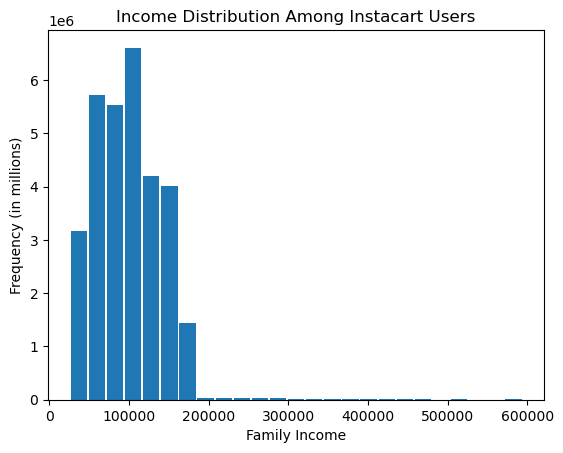

In [17]:
# creating histogram of incomes to see distribution

hist1 = df_2['income'].plot.hist(bins = 25, rwidth=0.9)

plt.xlabel("Family Income")
plt.ylabel("Frequency (in millions)")
plt.title("Income Distribution Among Instacart Users")

In [23]:
# exporting histogram
hist1.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'hist_customers_income.png'))

#### Creating profile column

In [15]:
# creating profile for "single adult with money"
df_2.loc[(df_2['family_status'] == 'single') & (df_2['age'] >= 18), 'profile'] = 'single adult'

In [16]:
# creating profile for small families with high incomes (above $100,000)
df_2.loc[(df_2['number_dependants'] == 1) & (df_2['income'] > 100000), 'profile'] = 'high-income small family'

In [17]:
# creating profile for medium families with high incomes (above $100,000)
df_2.loc[(df_2['number_dependants'] == 2) & (df_2['income'] > 100000), 'profile'] = 'high-income medium family'

In [18]:
# creating profile for big families with high incomes (above $100,000)
df_2.loc[(df_2['number_dependants'] == 3) & (df_2['income'] > 100000), 'profile'] = 'high-income big family'

In [19]:
# creating profile for small families with low incomes (below $100,000)
df_2.loc[(df_2['number_dependants'] == 1) & (df_2['income'] < 100000), 'profile'] = 'low-income small family'

In [20]:
# creating profile for medium families with low incomes (below $100,000)
df_2.loc[(df_2['number_dependants'] == 2) & (df_2['income'] < 100000), 'profile'] = 'low-income medium family'

In [21]:
# creating profile for big families with low incomes (below $100,000)
df_2.loc[(df_2['number_dependants'] == 3) & (df_2['income'] < 100000), 'profile'] = 'low-income big family'

In [22]:
# creating profile for "babies at home"  (department = 18 = babies)
df_2.loc[(df_2['number_dependants'] > 0) & (df_2['department_id'] == 18), 'profile'] = 'babies at home'

In [23]:
# creating profile for "employees" (department = 14 = breakfast)
df_2.loc[(df_2['order_hour_of_day'] < 12)  & (df_2['department_id'] == 14) & (df_2['age'] > 30) & (df_2['income'] > 30000), 'profile'] = 'employees'

In [24]:
# creating profile for "retired wealthy" 
df_2.loc[(df_2['age'] >= 65) & (df_2['income'] > 100000), 'profile'] = 'retired wealthy'

In [25]:
# creating profile for "retired less money" 
df_2.loc[(df_2['age'] < 65) & (df_2['income'] < 100000), 'profile'] = 'retired less money'

In [26]:
# labelling everyone else as "other"
df_2['profile'] = df_2['profile'].fillna('other')

In [27]:
df_2['profile'].value_counts(dropna = False)

retired less money           14303381
retired wealthy               5741763
high-income big family        2080524
high-income small family      2074535
high-income medium family     2024598
single adult                  1709728
other                         1019994
low-income medium family       615776
low-income small family        610234
low-income big family          587826
babies at home                 110750
employees                       85455
Name: profile, dtype: int64

### 6. Create an appropriate visualization to show the distribution of profiles

([<matplotlib.axis.XTick at 0x2335feb3370>,
 [Text(0, 0, 'retired\nless money'),
  Text(1, 0, 'retired\nwealthy'),
  Text(2, 0, 'high-income\nbig family'),
  Text(3, 0, 'high-income\nsmall family '),
  Text(4, 0, 'high-income\nmedium family'),
  Text(5, 0, 'single adult'),
  Text(6, 0, 'other'),
  Text(7, 0, 'low-income\nmedium family '),
  Text(8, 0, 'low-income\nsmall family '),
  Text(9, 0, 'low-income\nbig family'),
  Text(10, 0, 'babies\nat home '),
  Text(11, 0, 'employees')])

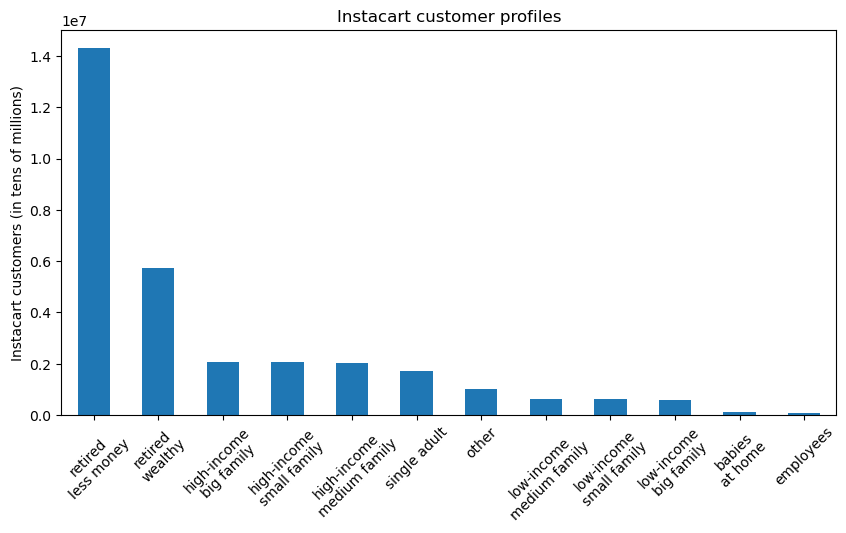

In [75]:
# creating a bar chart of instacart profiles

bar = df_2['profile'].value_counts().plot.bar(rot=45, figsize = (10,5))
plt.ylabel("Instacart customers (in tens of millions)")
plt.title ("Instacart customer profiles")
plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11],['retired\nless money','retired\nwealthy','high-income\nbig family', 'high-income\nsmall family ', 'high-income\nmedium family','single adult','other','low-income\nmedium family ','low-income\nsmall family ','low-income\nbig family','babies\nat home ','employees'])


In [76]:
bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'customer_profiles.png'), bbox_inches='tight')

### 7. Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure.

In [91]:
# Calculating the mode to see most usual values per column
print(df_2.groupby('profile').agg(lambda x:x.value_counts().index[0]))

                           order_id user_id  order_number  orders_day_of_week  \
profile                                                                         
babies at home              2933894   84092             1                   0   
employees                    289457  178520             1                   1   
high-income big family      1564244  108187             1                   0   
high-income medium family    604218  175294             1                   0   
high-income small family     653887  127158             1                   0   
low-income big family        384383  140440             2                   1   
low-income medium family    1037729   74315             1                   0   
low-income small family     1321070   17738             1                   1   
other                       2660847  176478             1                   0   
retired less money           790903  129928             1                   0   
retired wealthy             

#### From this calculation we found some interesting information:

1. The most common days for the customers to buy are saturday and sunday
2. Usually they buy products every 7 days
3. Most customers buy between 9 to 14 o'clock

In [95]:
# aggregating min, max, mean of prices and avg_days_since_last_order for all profiles
df_2.groupby('profile').agg({'prices': ['mean', 'min', 'max'], 'days_since_prior_order': ['mean', 'min', 'max']})

prices            days_since_prior_order       \
                               mean  min   max                   mean  min   
profile                                                                      
babies at home             7.650360  1.0  15.0               9.683640  0.0   
employees                  8.048704  1.0  14.9              10.807450  0.0   
high-income big family     7.954985  1.0  25.0              10.846302  0.0   
high-income medium family  7.958729  1.0  25.0              10.871777  0.0   
high-income small family   7.953260  1.0  25.0              10.794811  0.0   
low-income big family      7.405946  1.0  25.0              10.936569  0.0   
low-income medium family   7.417199  1.0  25.0              10.949381  0.0   
low-income small family    7.429636  1.0  25.0              10.772033  0.0   
other                      7.650038  1.0  25.0              10.778429  0.0   
retired less money         7.691442  1.0  25.0              10.839344  0.0   
retired wealthy            7.955200  1.0  25.0              10.755532  0.0   
single adult               7.946717  1.0  25.0              10.666752  0.0   

                                 
                            max  
profile                          
babies at home             30.0  
employees                  30.0  
high-income big family     30.0  
high-income medium family  30.0  
high-income small family   30.0  
low-income big family      30.0  
low-income medium family   30.0  
low-income small family    30.0  
other                      30.0  
retired less money         30.0  
retired wealthy            30.0  
single adult               30.0

### 8. Compare your customer profiles with regions and departments. Can you identify a link between them? Customers may demonstrate different behaviors across regions, which could make this information important.

In [109]:
# creating a crosstab to compare different profiles by region
crosstab_region = pd.crosstab(df_2['profile'], df_2['region'], dropna = False)

In [110]:
crosstab_region

region,Midwest,Northeast,South,West
profile,,,,
babies at home,25675,19181,37896,27998
employees,20488,14562,27749,22656
high-income big family,497356,371518,672813,538837
high-income medium family,495502,362041,669656,497399
high-income small family,508098,371750,661839,532848
low-income big family,131714,102364,195192,158556
low-income medium family,134995,107363,208825,164593
low-income small family,139978,114918,201809,153529
other,251654,178039,341817,248484


In [111]:
# creating a crosstab to compare different profiles by region
crosstab_department = pd.crosstab(df_2['profile'], df_2['department_id'], dropna = False)

In [112]:
crosstab_department

department_id,1,2,3,4,5,6,7,8,9,10,...,12,13,14,15,16,17,18,19,20,21
profile,,,,,,,,,,,,,,,,,,,,,
babies at home,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,110750,0,0,0
employees,0,0,0,0,0,0,0,0,0,0,...,0,0,85455,0,0,0,0,0,0,0
high-income big family,148269,2439,77995,635659,10908,17860,167832,7449,59156,1897,...,50414,124562,28470,72922,359813,48501,0,164201,68441,4194
high-income medium family,144982,2187,78502,608801,10332,17318,165516,5949,57340,2003,...,49473,123306,27855,71086,351215,47357,0,160048,68210,4324
high-income small family,147204,2368,77955,632094,10417,18021,167642,6254,58253,2269,...,50368,126448,29054,72895,359047,48563,0,164858,66933,4700
low-income big family,38781,541,20423,170528,2637,4416,56676,1523,13973,870,...,10788,32496,8445,17480,95720,14265,0,69807,19209,1196
low-income medium family,42562,682,21631,177971,2765,4956,57888,1359,15359,734,...,11441,35004,8951,18923,100367,14651,0,70655,19796,1335
low-income small family,41661,759,21840,174251,2935,4907,59478,1863,14386,730,...,11562,34263,9062,17767,99705,15643,0,70399,19480,1129
other,70941,1154,37514,292881,4624,8217,89830,2661,26246,1109,...,20805,57446,14495,31434,171558,22742,14256,101730,33925,2103


([<matplotlib.axis.XTick at 0x234c94d53d0>,
 [Text(0, 0, 'babies\nat home '),
  Text(1, 0, 'employees'),
  Text(2, 0, 'high-income\nbig family'),
  Text(3, 0, 'high-income\nmedium family'),
  Text(4, 0, 'high-income\nsmall family'),
  Text(5, 0, 'low-income\nbig family'),
  Text(6, 0, 'low-income\nmedium family '),
  Text(7, 0, 'low-income\nsmall family '),
  Text(8, 0, 'other'),
  Text(9, 0, 'retired\nless money'),
  Text(10, 0, 'retired\nwealthy'),
  Text(11, 0, 'single adult')])

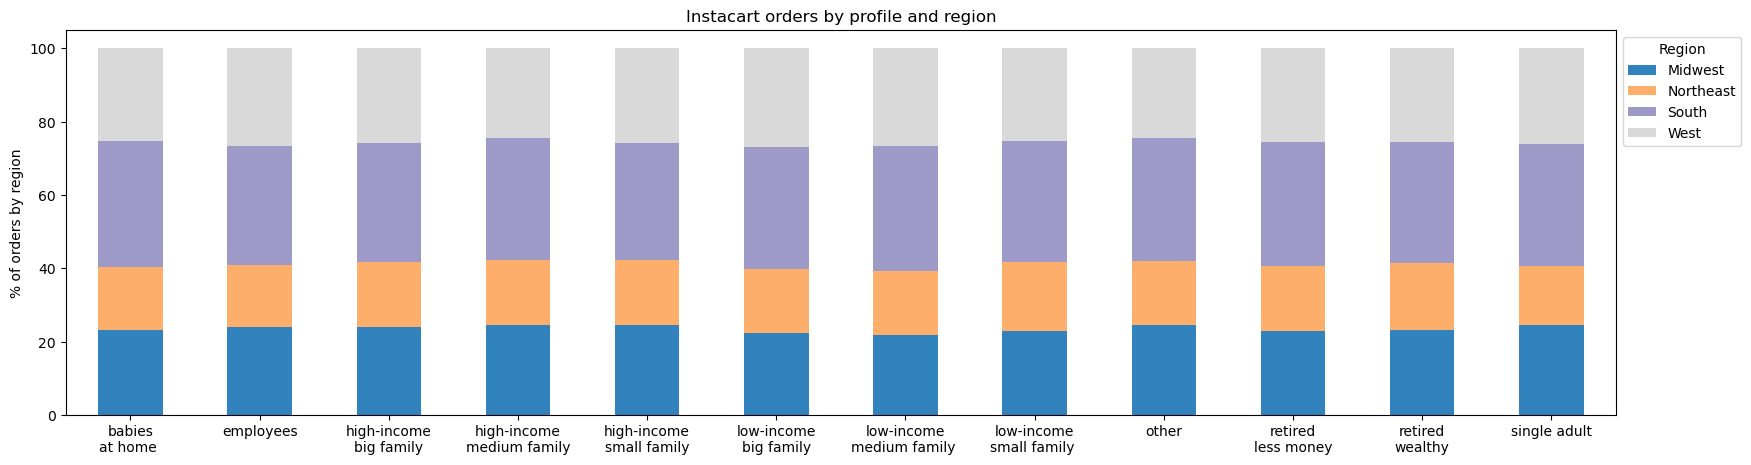

In [117]:
# Creating stacked bar graph to plot profile for regions
bar_profile_region = crosstab_region.loc[:,['Midwest','Northeast','South','West']].apply(lambda x: x*100/sum(x), axis=1).plot.bar(stacked=True, rot=0, figsize=(20,5), colormap='tab20c').legend(title="Region", bbox_to_anchor=(1.0,1.0))
plt.xlabel("")
plt.ylabel("% of orders by region")
plt.title ("Instacart orders by profile and region")
plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11],['babies\nat home ','employees','high-income\nbig family','high-income\nmedium family','high-income\nsmall family','low-income\nbig family','low-income\nmedium family ','low-income\nsmall family ','other','retired\nless money','retired\nwealthy', 'single adult'])

In [121]:
# exporting bar chart
bar_profile_region.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'profile_region.png'), bbox_inches='tight')

([<matplotlib.axis.XTick at 0x23362130070>,
 [Text(0, 0, 'babies\nat home '),
  Text(1, 0, 'employees'),
  Text(2, 0, 'high-income\nbig family'),
  Text(3, 0, 'high-income\nmedium family'),
  Text(4, 0, 'high-income\nsmall family'),
  Text(5, 0, 'low-income\nbig family'),
  Text(6, 0, 'low-income\nmedium family '),
  Text(7, 0, 'low-income\nsmall family '),
  Text(8, 0, 'other'),
  Text(9, 0, 'retired\nless money'),
  Text(10, 0, 'retired\nwealthy'),
  Text(11, 0, 'single adult')])

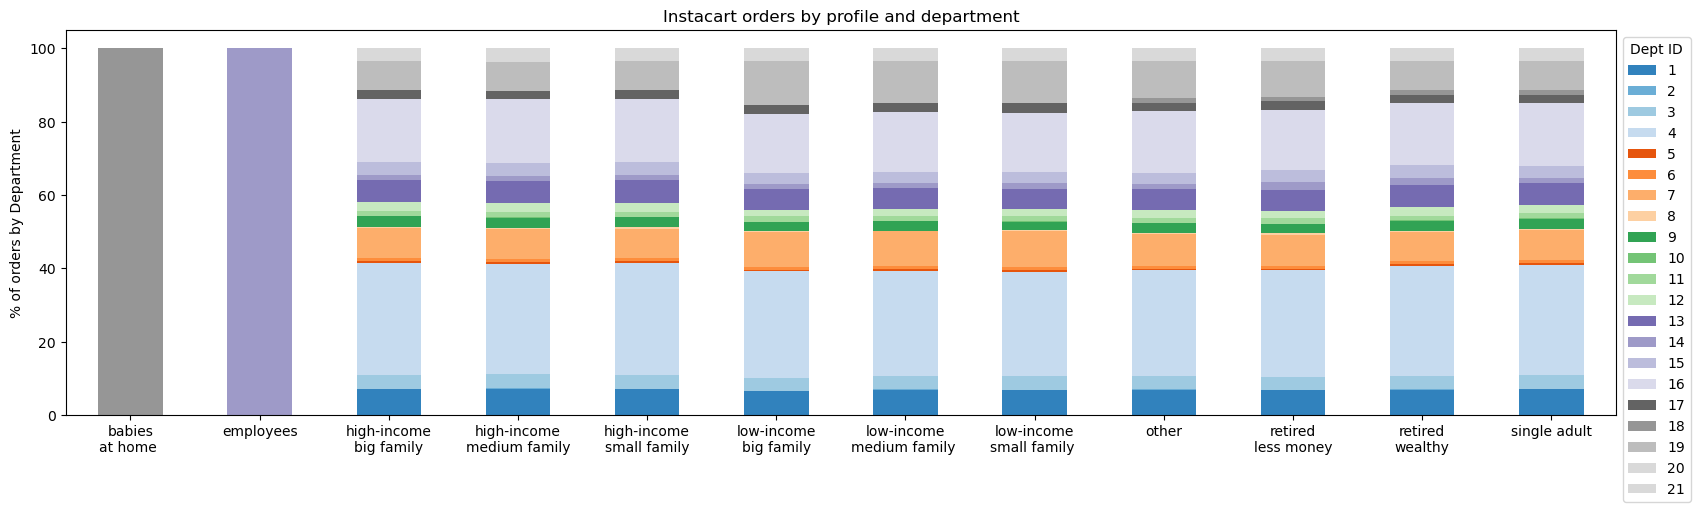

In [128]:
##### Creating stacked bar graph to plot profile for department
bar_profile_department = crosstab_department.loc[:,[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21]].apply(lambda x: x*100/sum(x), axis=1).plot.bar(stacked=True, rot=0, figsize=(20,5), colormap='tab20c').legend(title="Dept ID", bbox_to_anchor=(1.0,1.0))
plt.xlabel("")
plt.ylabel("% of orders by Department")
plt.title ("Instacart orders by profile and department")
plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11],['babies\nat home ','employees','high-income\nbig family','high-income\nmedium family','high-income\nsmall family','low-income\nbig family','low-income\nmedium family ','low-income\nsmall family ','other','retired\nless money','retired\nwealthy', 'single adult'])


### Extra plots

### Are there differences in ordering habits based on a customer’s region?

In [5]:
# creating a crosstab to compare different orders by region and price range
crosstab_orders_regions1 = pd.crosstab(df_2['region'], df_2['price_range_loc'], dropna = False)

In [6]:
crosstab_orders_regions1

price_range_loc,High-range product,Low-range product,Mid-range product
region,,,
Midwest,93280,2267085,4901148
Northeast,69732,1712360,3682593
South,132661,3217500,6960978
West,102280,2477895,5347052


Text(0.5, 1.0, 'Instacart orders by region and price range groupings')

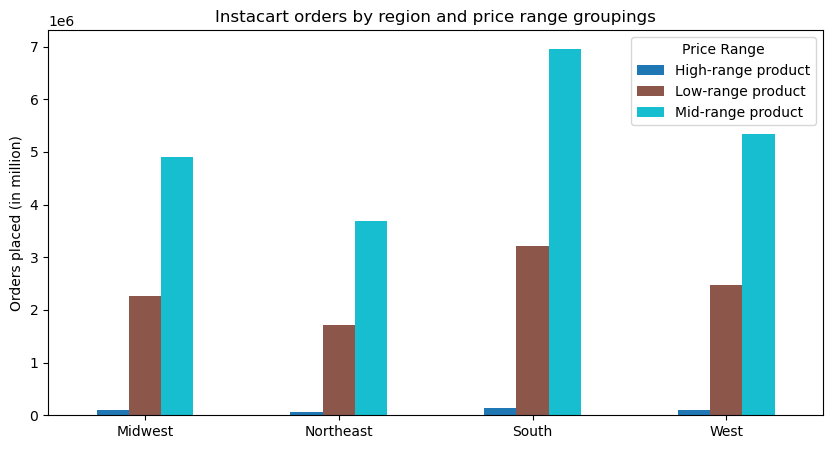

In [8]:
#creating a bar chart
barchart_price_region1 = crosstab_orders_regions1.iloc[:,[0,1,2]].plot.bar(rot=0, figsize=(10,5), colormap='tab10').legend(title="Price Range", bbox_to_anchor=(1.0,1.0))
plt.xlabel("")
plt.ylabel("Orders placed (in million)")
plt.title ("Instacart orders by region and price range groupings")

In [10]:
# creating a crosstab to compare different orders by region and loyalty
crosstab_orders_regions1 = pd.crosstab(df_2['region'], df_2['loyalty_flag'], dropna = False)

In [11]:
crosstab_orders_regions1

loyalty_flag,Loyal customer,New customer,Regular customer
region,,,
Midwest,2373774,1136761,3750978
Northeast,1841785,842156,2780744
South,3405844,1593664,5311631
West,2662690,1231114,4033423


Text(0.5, 1.0, 'Instacart orders by region and loyalty groupings')

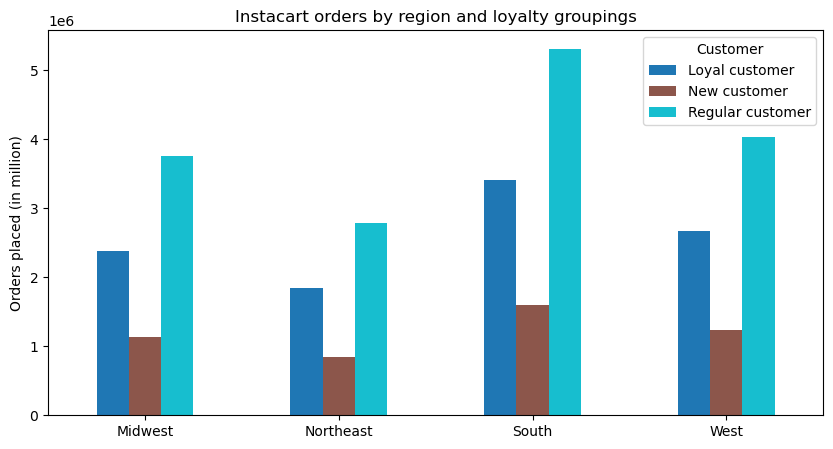

In [12]:
#creating a bar chart
barchart_loyalty_region1 = crosstab_orders_regions1.iloc[:,[0,1,2]].plot.bar(rot=0, figsize=(10,5), colormap='tab10').legend(title="Customer", bbox_to_anchor=(1.0,1.0))
plt.xlabel("")
plt.ylabel("Orders placed (in million)")
plt.title ("Instacart orders by region and loyalty groupings")

### What different classifications does the demographic information suggest? Age? Income? Certain types of goods? Family status?


##### Creating age categories

In [45]:
# creating age categories
df_2.loc[(df_2['age'] ==18) & (df_2['age'] < 25), 'age_flag'] = 'Youth (15-24 years)'
df_2.loc[(df_2['age'] ==25) & (df_2['age'] < 45), 'age_flag'] = 'Adult I (25-44 years)'
df_2.loc[(df_2['age'] ==44) & (df_2['age'] < 65), 'age_flag'] = 'Adult II (45-64 years)'
df_2.loc[(df_2['age'] > 64), 'age_flag'] = 'Seniors (65 years and over)'

In [46]:
df_2['age_flag'].value_counts()

Seniors (65 years and over)    8195544
Adult II (45-64 years)          494457
Youth (15-24 years)             478457
Adult I (25-44 years)           449324
Name: age_flag, dtype: int64

Text(0.5, 1.0, 'Instacart income for differente profiles')

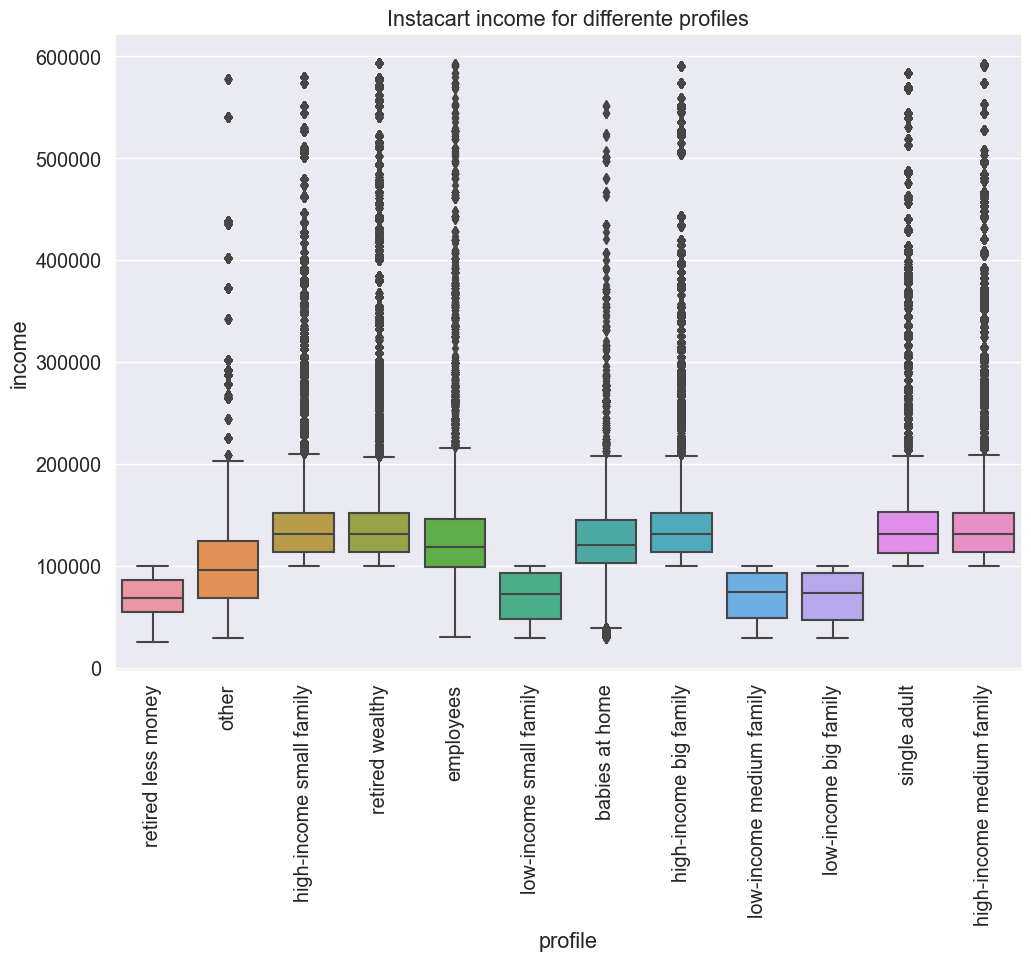

In [71]:
sns.set(font_scale=1.3)
boxplot_profile_income = sns.boxplot(x='profile',
                y='income',
                data=df_2)
plt.xticks(rotation=90)
plt.title ("Instacart income for differente profiles")

Text(0.5, 1.0, 'Instacart income for differente ages')

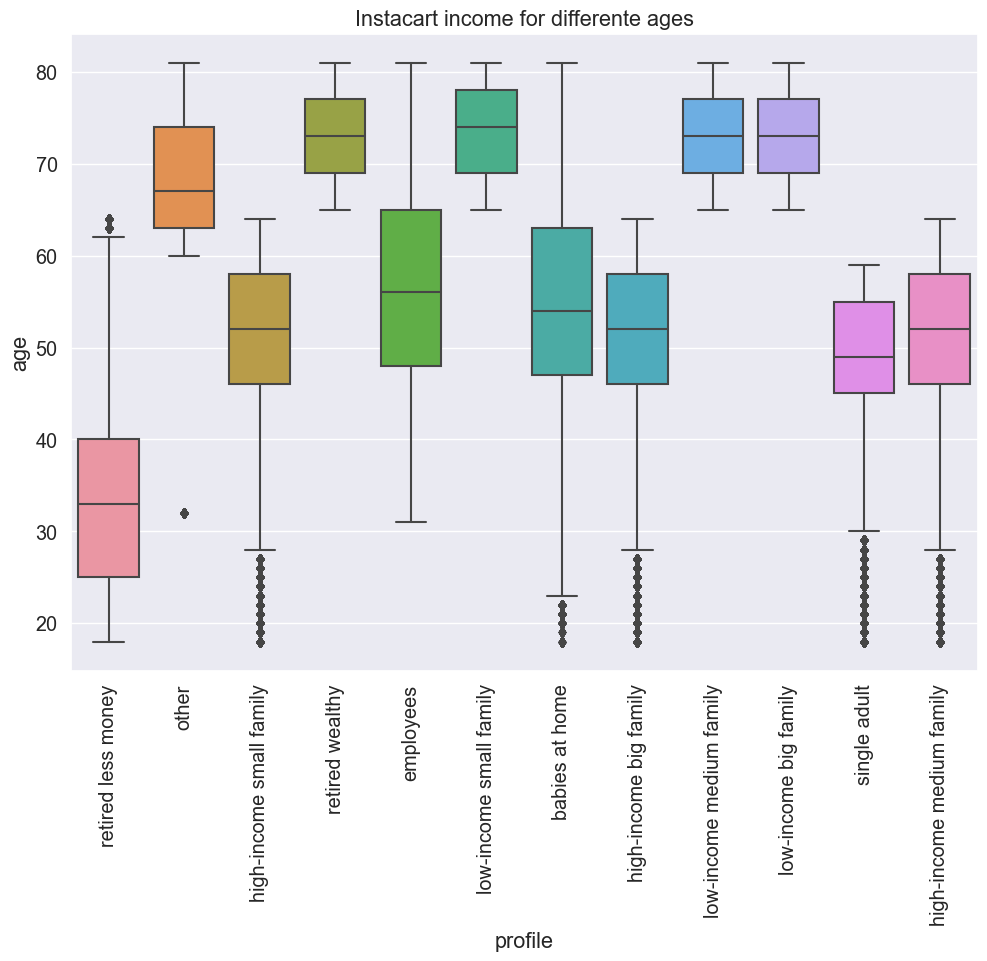

In [72]:
sns.set(font_scale=1.3)
boxplot_profile_age = sns.boxplot(x='profile',
                y='age',
                data=df_2)
plt.xticks(rotation=90)
plt.title ("Instacart income for differente ages")

In [76]:
# creating a crosstab to compare different orders by region and loyalty
crosstab_profile_family = pd.crosstab(df_2['profile'], df_2['family_status'], dropna = False)

In [77]:
crosstab_profile_family

family_status,divorced/widowed,living with parents and siblings,married,single
profile,,,,
babies at home,0,480,110270,0
employees,8410,0,64019,13026
high-income big family,0,15594,2064930,0
high-income medium family,0,14364,2010234,0
high-income small family,0,17110,2057425,0
low-income big family,0,0,587826,0
low-income medium family,0,0,615776,0
low-income small family,0,0,610234,0
other,1019630,0,364,0


([<matplotlib.axis.XTick at 0x29cd1cec490>,
 [Text(0, 0, 'babies\nat home '),
  Text(1, 0, 'employees'),
  Text(2, 0, 'high-income\nbig family'),
  Text(3, 0, 'high-income\nmedium family'),
  Text(4, 0, 'high-income\nsmall family'),
  Text(5, 0, 'low-income\nbig family'),
  Text(6, 0, 'low-income\nmedium family '),
  Text(7, 0, 'low-income\nsmall family '),
  Text(8, 0, 'other'),
  Text(9, 0, 'retired\nless money'),
  Text(10, 0, 'retired\nwealthy'),
  Text(11, 0, 'single adult')])

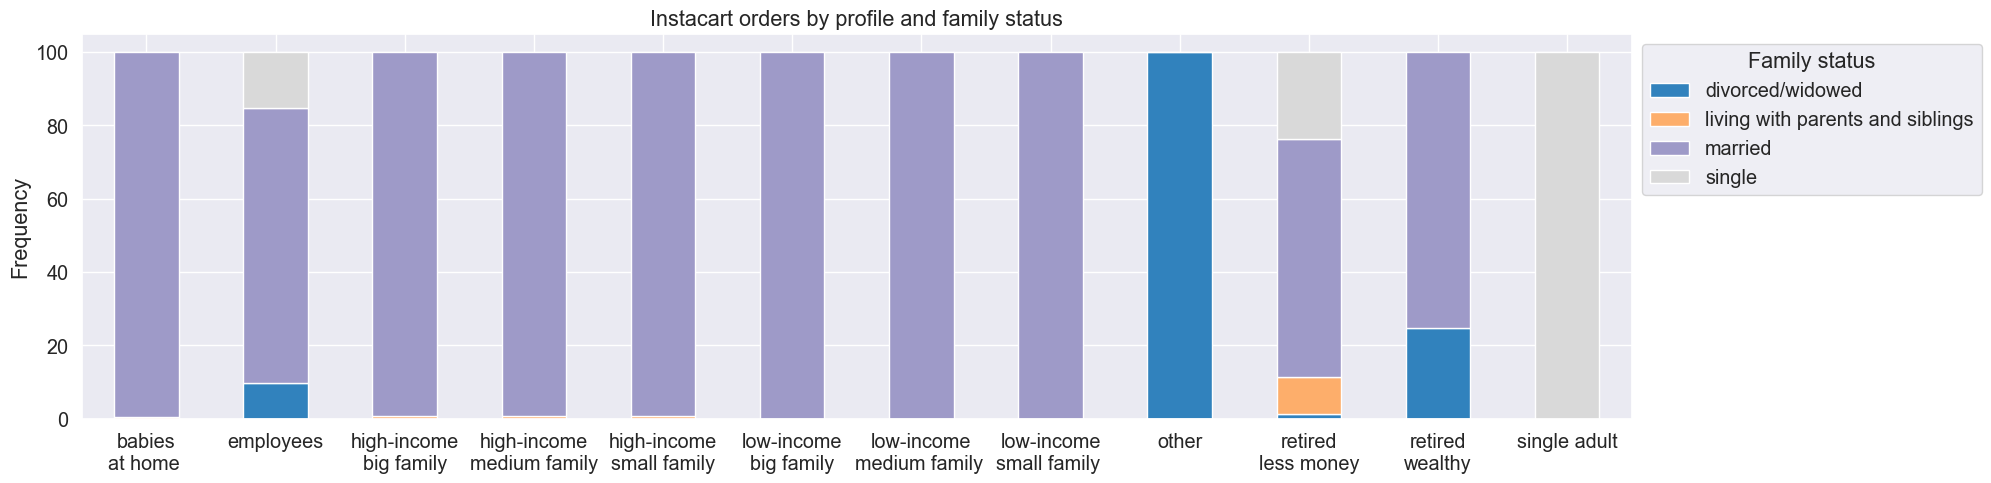

In [82]:
# Creating stacked bar graph to plot profile for family status
bar_profile_family = crosstab_profile_family.loc[:,['divorced/widowed','living with parents and siblings','married','single']].apply(lambda x: x*100/sum(x), axis=1).plot.bar(stacked=True, rot=0, figsize=(20,5), colormap='tab20c').legend(title="Family status", bbox_to_anchor=(1.0,1.0))
plt.xlabel("")
plt.ylabel("Frequency")
plt.title ("Instacart orders by profile and family status")
plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11],['babies\nat home ','employees','high-income\nbig family','high-income\nmedium family','high-income\nsmall family','low-income\nbig family','low-income\nmedium family ','low-income\nsmall family ','other','retired\nless money','retired\nwealthy', 'single adult'])

### Saving plots

In [62]:
# exporting bar chart
bar_profile_department.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'profile_department.png'), bbox_inches='tight')

NameError: name 'bar_profile_department' is not defined

In [63]:
barchart_price_region1.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'barchart_price_region1.png'), bbox_inches='tight')

In [64]:
barchart_loyalty_region1.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'barchart_loyalty_region1.png'), bbox_inches='tight')

In [73]:
boxplot_profile_income.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'boxplot_profile_income.png'), bbox_inches='tight')

In [74]:
boxplot_profile_age.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'boxplot_profile_age.png'), bbox_inches='tight')

In [83]:
bar_profile_family.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_profile_family.png'), bbox_inches='tight')

### 9. Exporting dataset

In [129]:
# Export data frame with new variable profile
df_2.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'df_high_activity_customers_profile.pkl'))